In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ConvNet import ConvLayer, ConvNet, FlattenLayer, DenseLayer, PoolLayer
from keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# train_shuffle = np.random.permutation(len(X_train)).reshape(-1, 1)
# X_train = X_train[train_shuffle]
# Y_train = Y_train[train_shuffle]

X_train = X_train.reshape(-1, 1, 28, 28)
X_train = (X_train - X_train.mean(axis = 0)) / 128.0
X_test  = X_test.reshape(-1, 1, 28, 28) 
X_test  = (X_test - X_train.mean(axis = 0)) / 128.0
Y_train = tf.keras.utils.to_categorical(Y_train).T
Y_test  = tf.keras.utils.to_categorical(Y_test).T

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28), (10, 60000), (10, 10000))

In [3]:
net = ConvNet()
net.add(ConvLayer(num_filters =  8, filter_size = 3, stride = 1, mode = 'valid', activation = 'relu'))
net.add(ConvLayer(num_filters = 16, filter_size = 3, stride = 1, mode = 'valid', activation = 'relu'))
net.add(PoolLayer(filter_size =  2, stride = 2, mode = 'max'))
net.add(FlattenLayer())
net.add(DenseLayer(num_units = 128, activation = 'relu'))
net.add(DenseLayer(num_units =  64, activation = 'relu'))
net.add(DenseLayer(num_units =  10, activation = 'softmax'))
hist_loss, hist_acc = net.fit(X_train[:6016], Y_train[:, :6016], num_epochs = 10, learning_rate = 0.05)

[Epoch  1/10] - [=============================>] - loss: 1.5469 - train_accuracy: 0.5936
[Epoch  2/10] - [=============================>] - loss: 0.4655 - train_accuracy: 0.8685
[Epoch  3/10] - [=============================>] - loss: 0.3193 - train_accuracy: 0.9137
[Epoch  4/10] - [=============================>] - loss: 0.2571 - train_accuracy: 0.9318
[Epoch  5/10] - [=============================>] - loss: 0.2141 - train_accuracy: 0.9437
[Epoch  6/10] - [=============================>] - loss: 0.1839 - train_accuracy: 0.9508
[Epoch  7/10] - [=============================>] - loss: 0.1625 - train_accuracy: 0.9586
[Epoch  8/10] - [=============================>] - loss: 0.1481 - train_accuracy: 0.9629
[Epoch  9/10] - [=============================>] - loss: 0.1326 - train_accuracy: 0.9656
[Epoch 10/10] - [=============================>] - loss: 0.1184 - train_accuracy: 0.9701


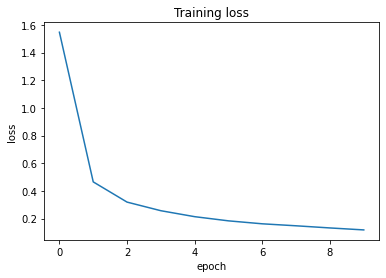

In [4]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.show()

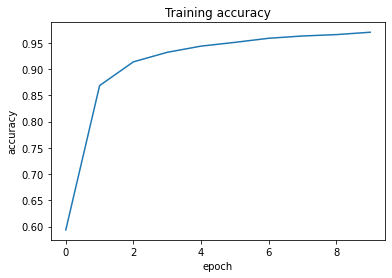

In [5]:
plt.plot(hist_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training accuracy')
plt.show()

In [6]:
test_loss, test_acc = net.evaluate(X_test, Y_test)
print('test_loss: {:.4f} - test_accuracy: {:.4f}'.format(test_loss, test_acc))

[Epoch 1/1] - [=============================>] - loss: 0.6110 - train_accuracy: 0.8500
test_loss: 0.4061 - test_accuracy: 0.8666


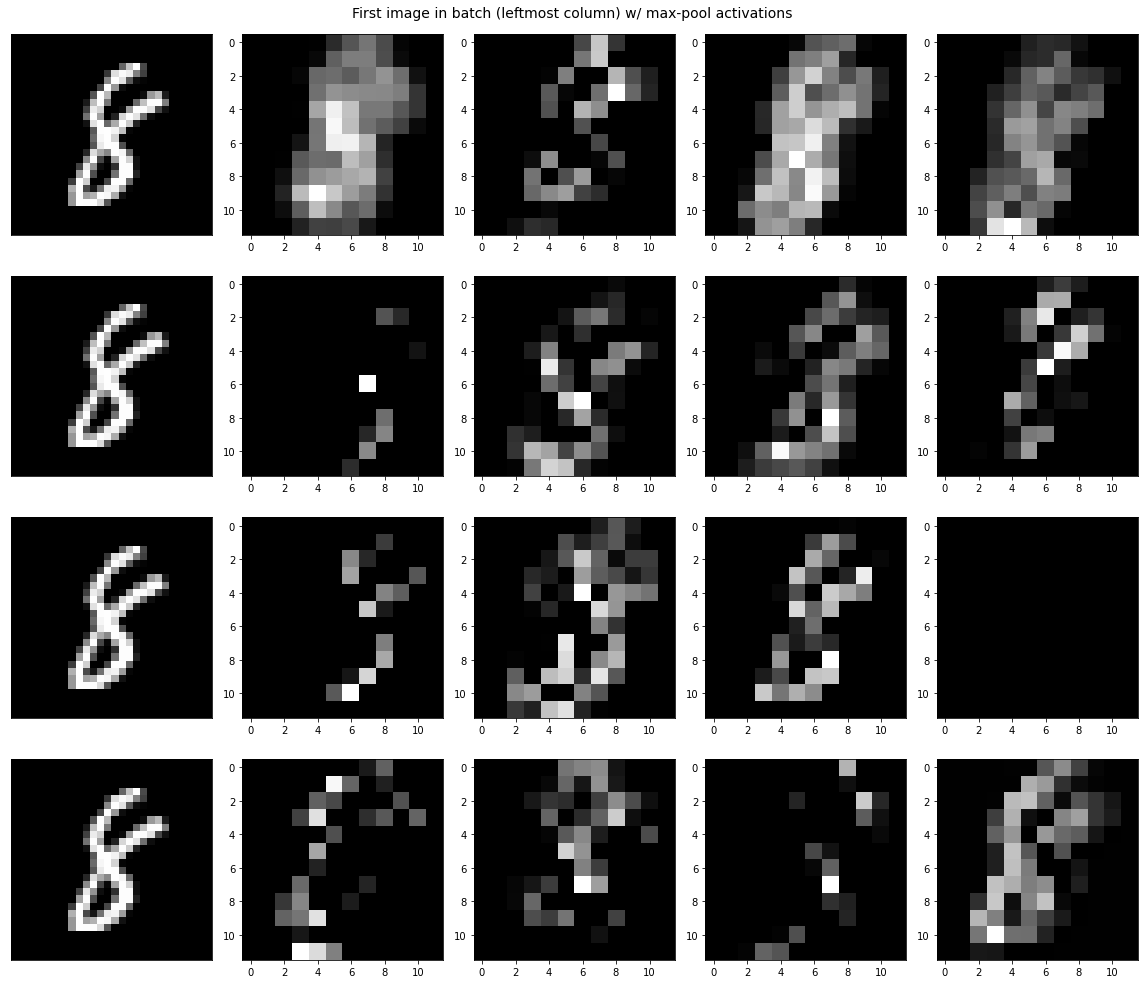

In [18]:
idx = 0

input_batch = net.layers[0].input_batch[idx]
activation  = net.layers[2].pooled[idx]
fig, ax = plt.subplots(4, 5)
fig.set_size_inches((16, 14))

for i in range(4):
    ax[i, 0].imshow(input_batch[0], cmap = 'gray')
    ax[i, 0].get_xaxis().set_visible(False)
    ax[i, 0].get_yaxis().set_visible(False)
    for j in range(4):
        ax[i, 1 + j].imshow(activation[i * 4 + j], cmap = 'gray')

fig.suptitle('First image in batch (leftmost column) w/ max-pool activations', fontsize = 14) 
plt.tight_layout()
plt.show()